#  EMF RBM Energy Densities 2

Look at different ways of computing the

- energy density
- free energy density
- entropy density

We can

- use the TAP S and MF Energy *U_naive   
    - which takes an equlibration step first  
    - S(mv, mh), U_naive(mv, mh)
- use a simple h = means_hiddens() step
    - S(v, h), E_MF(v, h)


In [1]:
import numpy as np
import h5py

import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn import linear_model, datasets, metrics, preprocessing 
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score

import psutil

In [2]:
from sklearn.datasets import fetch_mldata
from sklearn.utils.validation import assert_all_finite
from scipy.sparse import csc_matrix, csr_matrix, lil_matrix
from sklearn.preprocessing import Binarizer
np.seterr(all='warn')

{'divide': 'warn', 'invalid': 'warn', 'over': 'warn', 'under': 'ignore'}

In [3]:
hf =  h5py.File('mnist.h5','r')
print('List of arrays in this file: \n', hf.keys())
X = np.array(hf.get('HDF5.name___X'))
y = np.array(hf.get('HDF5.name___y'))

print X.shape, y.shape
hf.close()
np.linalg.norm(X, ord=2)

('List of arrays in this file: \n', [u'HDF5.name___X', u'HDF5.name___y'])
(60000, 784) (60000,)


2117.6342254841179

### Helper methods for simple case

In [4]:
from sklearn.utils.fixes import expit    
from sklearn.utils.extmath import safe_sparse_dot

def sig_means(x, b, W):
    a = safe_sparse_dot(x, W.T) + b
    return expit(a, out=a)

### Baseline

In [5]:
import emf_rbm

In [6]:
psutil.swap_memory()

sswap(total=0, used=0, free=0, percent=0.0, sin=0, sout=0)

In [8]:
rbm = emf_rbm.EMF_RBM(verbose=True)
rbm.fit(X)

[EMF_RBM] Iteration 1, pseudo-likelihood = -185.85, time = 23.88s
[EMF_RBM] Iteration 2, pseudo-likelihood = -151.51, time = 27.25s
[EMF_RBM] Iteration 3, pseudo-likelihood = -133.08, time = 27.29s
[EMF_RBM] Iteration 4, pseudo-likelihood = -124.07, time = 27.33s
[EMF_RBM] Iteration 5, pseudo-likelihood = -112.83, time = 27.08s
[EMF_RBM] Iteration 6, pseudo-likelihood = -108.44, time = 27.07s
[EMF_RBM] Iteration 7, pseudo-likelihood = -104.34, time = 27.03s
[EMF_RBM] Iteration 8, pseudo-likelihood = -99.38, time = 27.06s
[EMF_RBM] Iteration 9, pseudo-likelihood = -97.35, time = 27.09s
[EMF_RBM] Iteration 10, pseudo-likelihood = -92.24, time = 27.03s
[EMF_RBM] Iteration 11, pseudo-likelihood = -88.51, time = 27.23s
[EMF_RBM] Iteration 12, pseudo-likelihood = -87.37, time = 27.07s
[EMF_RBM] Iteration 13, pseudo-likelihood = -88.47, time = 27.42s
[EMF_RBM] Iteration 14, pseudo-likelihood = -83.94, time = 27.01s
[EMF_RBM] Iteration 15, pseudo-likelihood = -84.19, time = 27.06s
[EMF_RBM] It

EMF_RBM(batch_size=100, decay=0.01, learning_rate=0.005, momentum=0.5,
    monitor=False, n_components=256, n_iter=20, neq_steps=3,
    random_state=<mtrand.RandomState object at 0x7f5524115a00>,
    sigma=0.001, thresh=1e-08, verbose=True, weight_decay='L1')

In [ ]:
### Mean field TAP Energies

Not exactly Gaussian

In [9]:
ids = np.random.choice(X.shape[0], size=6000)

In [10]:
U = rbm._U_naive_TAP(X[ids])

In [11]:
U.shape

(6000,)

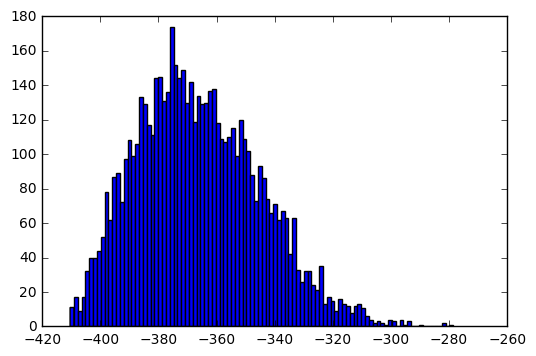

In [12]:
plt.hist(U,100);

### Plain Mean field Energies


In [14]:
p = sig_means(X[ids],rbm.h_bias,rbm.W)

In [15]:
Emf = safe_sparse_dot(p, rbm.h_bias) + safe_sparse_dot(X[ids], rbm.v_bias)  + (X[ids].dot(rbm.W.T)*p).sum(axis=1)

In [16]:
Emf.shape

(6000,)

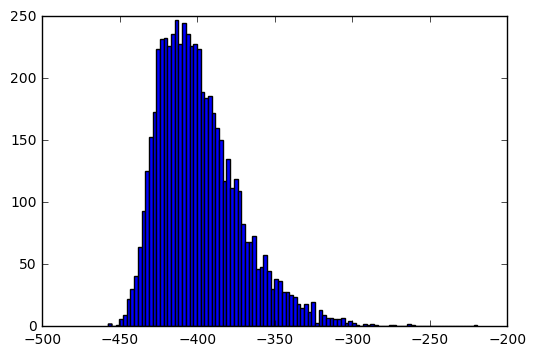

In [17]:
plt.hist(-Emf,100);

These are clearly NOT Guassian distributions, and I have a feeling that these are ground state energies, and subject to EVS, not the REM.  And that the REM has to be determined by looking at all Energies during all training steps

### All energies from all steps

Lets compute as many energies as we can and see what we get

(very very slow)
(took this out of code but left in the notebook for now)

### replaced, not really interesting

In [19]:
rbm = EMF_RBM(verbose=True)
emf_rbm, U_energies = emf_rbm.fit_wEs(X)

NameError: name 'EMF_RBM' is not defined

In [27]:
Emf = U_energies[1]
len(Emf)
import itertools
merged = list(itertools.chain.from_iterable(Emf))

20

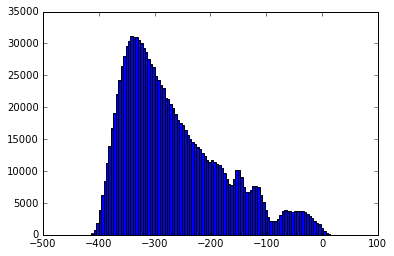

In [33]:
plt.hist(merged,100);
plt.title("all energies, for all data, for all iterations")

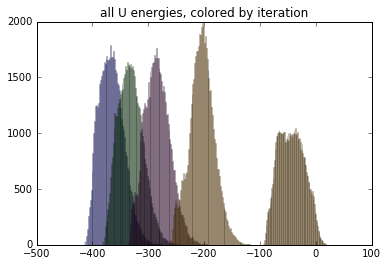

In [43]:
plt.hist(Emf[19],100, alpha=0.25);
plt.hist(Emf[14],100, alpha=0.25, color='green');
plt.hist(Emf[9],100, alpha=0.25, color='purple');
plt.hist(Emf[4],100, alpha=0.25, color='orange');
plt.hist(Emf[0],100, alpha=0.25, color='orange');

plt.title("all U energies, colored by iteration")

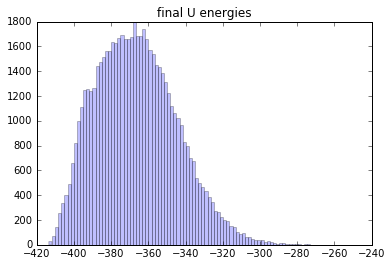

In [44]:
plt.hist(Emf[19],100, alpha=0.25);
plt.title("final U energies")

So ... what is the best interepretation ?

### mean Entropy, Energy, and Free Energy

In [21]:
rbm = emf_rbm.EMF_RBM(verbose=True, monitor=True)
rbm= rbm.fit(X)

[EMF_RBM] Iteration 1, pseudo-likelihood = -183.97, time = 23.73s
computing TAP Free Energies
monitor:  -376.426693209 331.539359594 -43.719583282
[EMF_RBM] Iteration 2, pseudo-likelihood = -151.26, time = 55.30s
computing TAP Free Energies
monitor:  -378.740222002 258.437633708 -118.026275196
[EMF_RBM] Iteration 3, pseudo-likelihood = -133.44, time = 55.15s
computing TAP Free Energies
monitor:  -387.366198494 230.797582778 -153.602552854
[EMF_RBM] Iteration 4, pseudo-likelihood = -121.00, time = 54.83s
computing TAP Free Energies
monitor:  -398.796273505 214.015886664 -181.179068398
[EMF_RBM] Iteration 5, pseudo-likelihood = -113.93, time = 55.05s
computing TAP Free Energies
monitor:  -410.262617564 202.180610184 -203.875258686
[EMF_RBM] Iteration 6, pseudo-likelihood = -105.69, time = 54.97s
computing TAP Free Energies
monitor:  -422.039761513 192.438632297 -224.89336645
[EMF_RBM] Iteration 7, pseudo-likelihood = -102.03, time = 54.93s
computing TAP Free Energies
monitor:  -432.75758

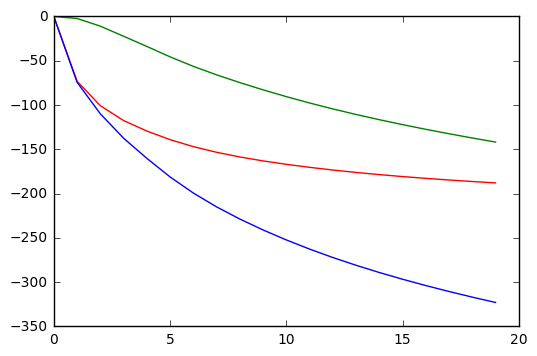

In [22]:
plt.plot(rbm.entropies-rbm.entropies[0], color='red')
plt.plot(rbm.mean_field_energies-rbm.mean_field_energies[0], color='blue')
plt.plot(rbm.free_energies-rbm.free_energies[0], color='green')

### Random Data

In [23]:
noise = np.random.normal(size=X.shape)

In [24]:
N = X+noise;

In [25]:
from matplotlib import pyplot
import matplotlib as mpl
%matplotlib inline  

def show_image(image): 
    fig = pyplot.figure()
    ax = fig.add_subplot(1,1,1)
    imgplot = ax.imshow(image, cmap=mpl.cm.Greys)
    imgplot.set_interpolation('nearest')
    ax.xaxis.set_ticks_position('top')
    ax.yaxis.set_ticks_position('left')
    pyplot.show()

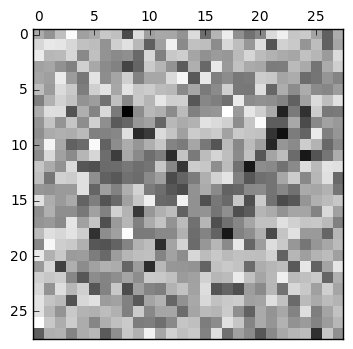

In [26]:
v = N[0,:]
show_image(np.reshape(v,[28,28]))

###  not really binarized but it should be

In [27]:
rbm = emf_rbm.EMF_RBM(verbose=True, monitor=True)
rbm= rbm.fit(N)

[EMF_RBM] Iteration 1, pseudo-likelihood = -1984.87, time = 23.61s
computing TAP Free Energies
monitor:  -214.27720064 345.116441193 132.482529698
[EMF_RBM] Iteration 2, pseudo-likelihood = -2289.70, time = 54.82s
computing TAP Free Energies
monitor:  -212.463045855 289.551685783 80.5501395216
[EMF_RBM] Iteration 3, pseudo-likelihood = -2665.03, time = 54.34s
computing TAP Free Energies
monitor:  -206.02115681 268.864411282 68.6574562623
[EMF_RBM] Iteration 4, pseudo-likelihood = -3034.50, time = 54.28s
computing TAP Free Energies
monitor:  -185.211284957 258.639333632 82.7512464944
[EMF_RBM] Iteration 5, pseudo-likelihood = -3463.36, time = 54.24s
computing TAP Free Energies
monitor:  -148.856764142 252.770171217 118.286400823
[EMF_RBM] Iteration 6, pseudo-likelihood = -4108.11, time = 54.42s
computing TAP Free Energies
monitor:  -93.9193220053 249.195209266 176.339232284
[EMF_RBM] Iteration 7, pseudo-likelihood = -4657.63, time = 54.12s
computing TAP Free Energies
monitor:  -24.26072

emf_rbm.py:249: RuntimeWarning: underflow encountered in multiply
  mv = 0.5 *self.mv_update(mv, mh) + 0.5*mv


[EMF_RBM] Iteration 13, pseudo-likelihood = -9345.94, time = 54.23s
computing TAP Free Energies
monitor:  544.360845918 222.1033689 844.864667248
[EMF_RBM] Iteration 14, pseudo-likelihood = -10069.54, time = 54.17s
computing TAP Free Energies
monitor:  650.076553401 219.285126684 956.502673307
[EMF_RBM] Iteration 15, pseudo-likelihood = -10553.91, time = 54.12s
computing TAP Free Energies
monitor:  757.281913454 216.954973872 1070.94834399
[EMF_RBM] Iteration 16, pseudo-likelihood = -11638.03, time = 54.18s
computing TAP Free Energies
monitor:  865.981087889 215.121119279 1188.57566047
[EMF_RBM] Iteration 17, pseudo-likelihood = -12674.29, time = 54.18s
computing TAP Free Energies
monitor:  975.719433574 213.697049263 1309.08476125
[EMF_RBM] Iteration 18, pseudo-likelihood = -12865.28, time = 54.25s
computing TAP Free Energies
monitor:  1086.48367587 212.62799581 1432.73051027
[EMF_RBM] Iteration 19, pseudo-likelihood = -14503.60, time = 54.11s
computing TAP Free Energies
monitor:  119

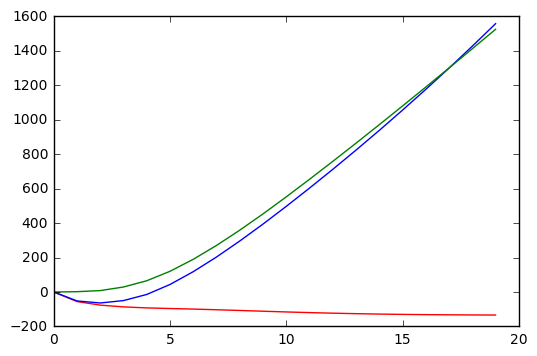

In [28]:
plt.plot(rbm.entropies-rbm.entropies[0], color='red')
plt.plot(rbm.mean_field_energies-rbm.mean_field_energies[0], color='blue')
plt.plot(rbm.free_energies-rbm.free_energies[0], color='green')